<a href="https://colab.research.google.com/github/heispv/programming-feb2023/blob/master/44_make_it_more_3D_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it more 3D

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget -O names.txt https://raw.githubusercontent.com/heispv/programming-feb2023/master/names.txt

--2024-05-12 18:27:42--  https://raw.githubusercontent.com/heispv/programming-feb2023/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2024-05-12 18:27:42 (8.27 MB/s) - ‘names.txt’ saved [228145/228145]



## Data Preprocessing

In [4]:
# Read the file
with open("names.txt", "r") as f:
    names = f.read().splitlines()

In [5]:
# Check the data
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
# Check the longest and shortes string in the dataset
print(f'Longest string in names: {max([len(name) for name in names])}')
print(f'Shortest string in names: {min([len(name) for name in names])}')

Longest string in names: 15
Shortest string in names: 2


In [7]:
set(''.join(names))

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [8]:
['.', '.'] + list('hello') + ['.']

['.', '.', 'h', 'e', 'l', 'l', 'o', '.']

In [9]:
b = dict()

for name in names:
    characters = ['.', '.'] + list(name) + ['.']
    for ch1, ch2, ch3 in zip(characters, characters[1:], characters[2:]):
        b[(ch1, ch2, ch3)] = b.get((ch1, ch2, ch3), 0) + 1

In [10]:
b

{('.', '.', 'e'): 1531,
 ('.', 'e', 'm'): 288,
 ('e', 'm', 'm'): 100,
 ('m', 'm', 'a'): 72,
 ('m', 'a', '.'): 174,
 ('.', '.', 'o'): 394,
 ('.', 'o', 'l'): 104,
 ('o', 'l', 'i'): 69,
 ('l', 'i', 'v'): 54,
 ('i', 'v', 'i'): 78,
 ('v', 'i', 'a'): 147,
 ('i', 'a', '.'): 903,
 ('.', '.', 'a'): 4410,
 ('.', 'a', 'v'): 243,
 ('a', 'v', 'a'): 161,
 ('v', 'a', '.'): 93,
 ('.', '.', 'i'): 591,
 ('.', 'i', 's'): 124,
 ('i', 's', 'a'): 142,
 ('s', 'a', 'b'): 76,
 ('a', 'b', 'e'): 173,
 ('b', 'e', 'l'): 201,
 ('e', 'l', 'l'): 822,
 ('l', 'l', 'a'): 337,
 ('l', 'a', '.'): 684,
 ('.', '.', 's'): 2055,
 ('.', 's', 'o'): 152,
 ('s', 'o', 'p'): 21,
 ('o', 'p', 'h'): 37,
 ('p', 'h', 'i'): 61,
 ('h', 'i', 'a'): 81,
 ('.', '.', 'c'): 1542,
 ('.', 'c', 'h'): 352,
 ('c', 'h', 'a'): 236,
 ('h', 'a', 'r'): 329,
 ('a', 'r', 'l'): 287,
 ('r', 'l', 'o'): 44,
 ('l', 'o', 't'): 14,
 ('o', 't', 't'): 34,
 ('t', 't', 'e'): 121,
 ('t', 'e', '.'): 175,
 ('.', '.', 'm'): 2538,
 ('.', 'm', 'i'): 393,
 ('m', 'i', 'a'): 9

In [11]:
chars = sorted(list(set(''.join(names))))

In [12]:
num_chars = len(chars) + 1
num_chars

27

In [13]:
# Create lookup table
s_to_i = {k: v+1 for v, k in enumerate(chars)}

In [14]:
s_to_i['.'] = 0

In [15]:
s_to_i

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [16]:
i_to_s = {k: v for v, k in s_to_i.items()}

In [17]:
i_to_s

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [18]:
my_matrix = np.zeros((num_chars, num_chars, num_chars))
my_matrix.shape

(27, 27, 27)

In [19]:
len(b)

6063

In [20]:
27 * 27 * 27

19683

In [21]:
for k, v in b.items():
    ch1, ch2, ch3 = k
    idx1 = s_to_i[ch1]
    idx2 = s_to_i[ch2]
    idx3 = s_to_i[ch3]

    my_matrix[idx1][idx2][idx3] = v

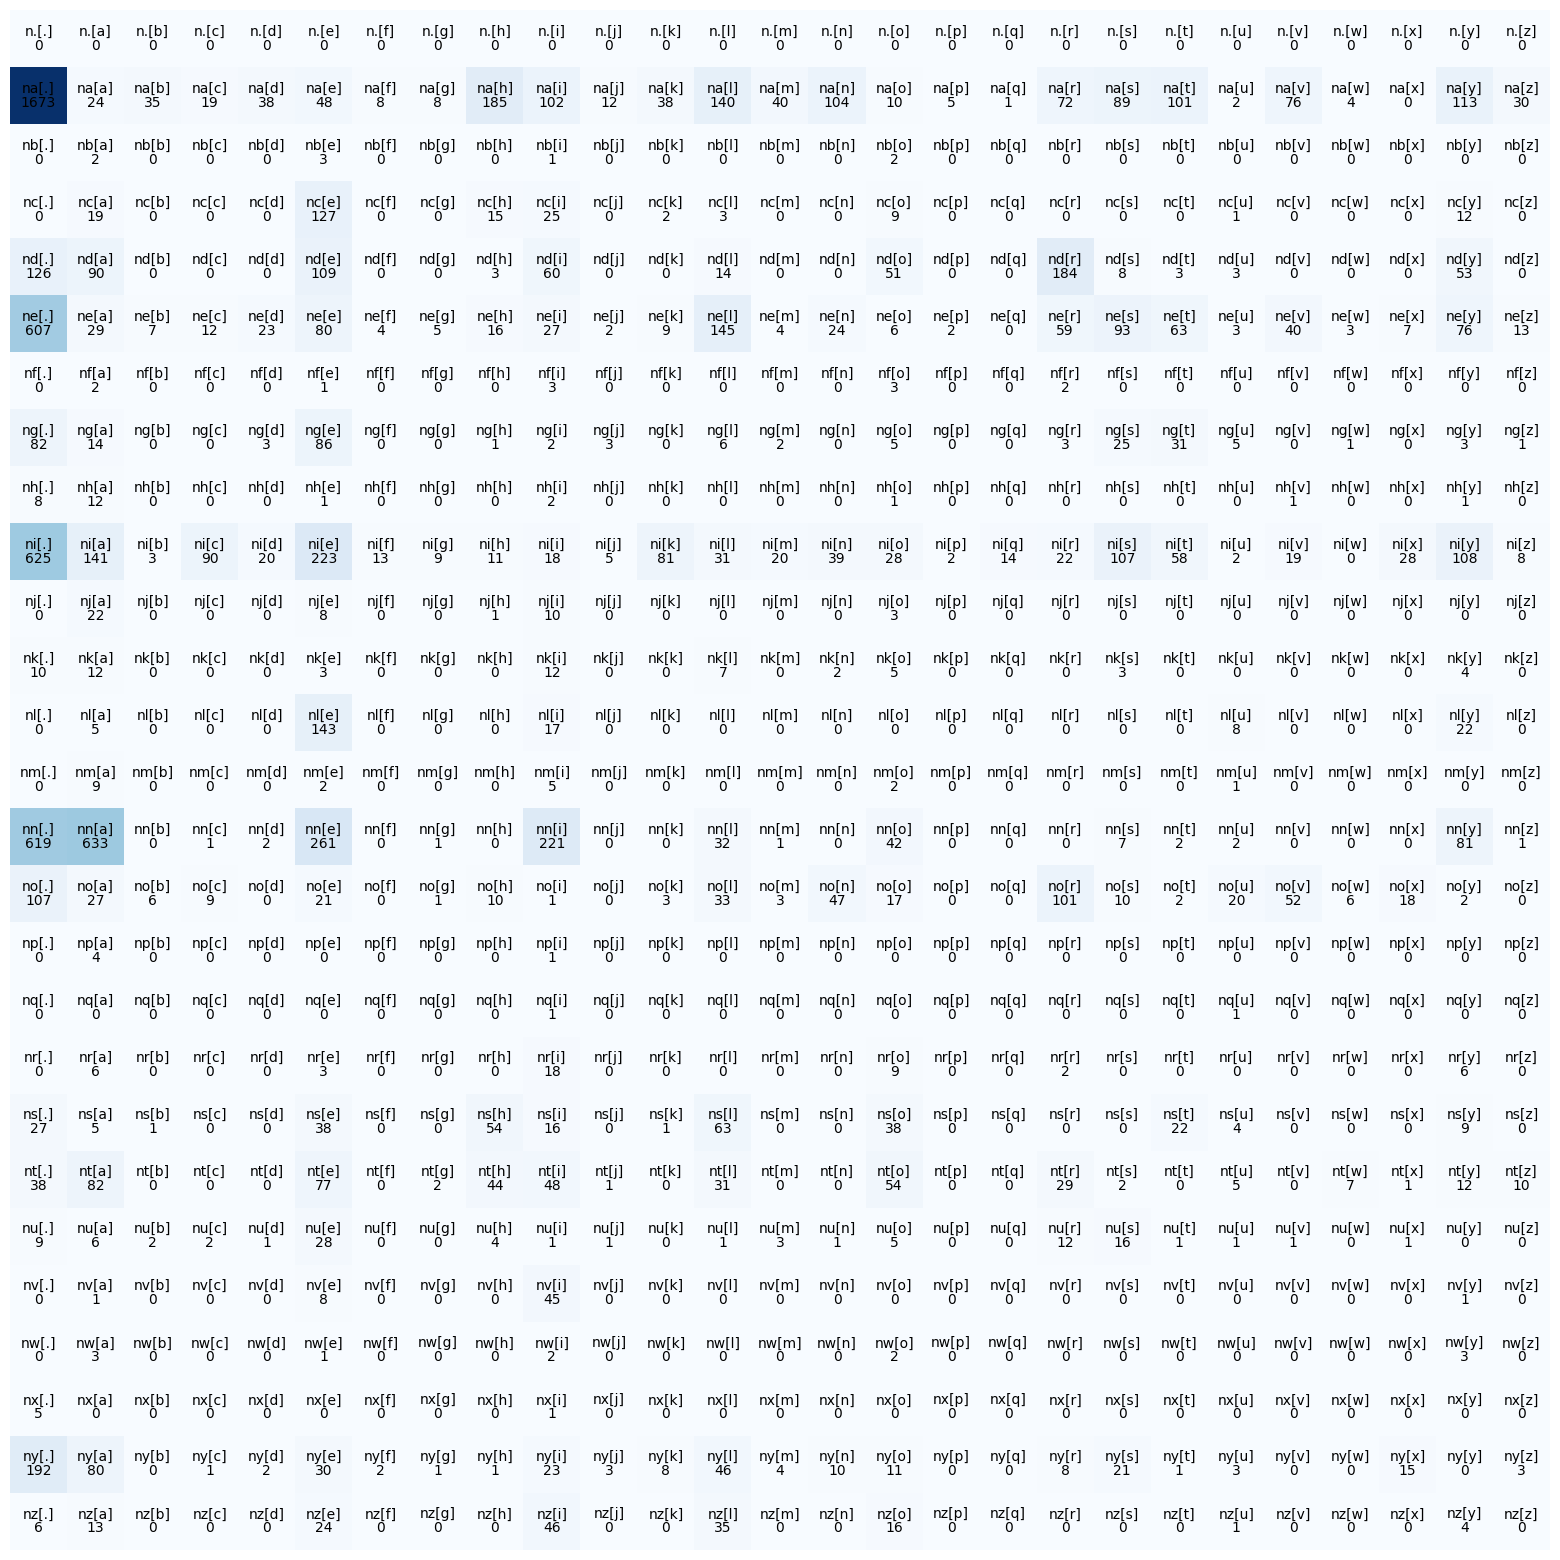

In [30]:
ch = 'n'
n = s_to_i[ch]

plt.figure(figsize=(20, 20))
plt.imshow(my_matrix[n], cmap="Blues")

for i in range(27):
    for j in range(27):
        ch_str = ch + i_to_s[i] + '[' + i_to_s[j] + ']'
        plt.text(j, i, ch_str, ha="center", va="bottom", color="k")
        plt.text(j, i, int(my_matrix[n, i, j].item()), ha="center", va="top", color="k")

plt.axis("off")
plt.show()

In [ ]:
majmoo = my_matrix.sum(axis=0) #satr ha ro baham jam mikone
majmoo
# agar bekhaim sotoon haro baham jam konim bayad az axis=1 estefade konim

array([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,
        7616., 17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,
        1026.,   272., 12700.,  8106.,  5570.,  3135.,  2573.,   929.,
         697.,  9776.,  2398.])

In [ ]:
majmoo.shape

(27,)

In [ ]:
my_matrix.shape

(27, 27)

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
b = np.array([[3], [4]])
b

array([[3],
       [4]])

In [ ]:
a.shape, b.shape

((2, 3), (2, 1))

In [ ]:
a = [[1, 2, 3],
     [4, 5, 6]]

b = [[3, 3, 3],
     [4, 4, 4]]

In [ ]:
res = my_matrix / majmoo
res[0]

array([0.        , 0.13014608, 0.49376181, 0.43657984, 0.30749636,
       0.0749645 , 0.46077348, 0.34717177, 0.1147584 , 0.03338794,
       0.83517241, 0.58789683, 0.11262359, 0.38211382, 0.06253069,
       0.04965969, 0.50194932, 0.33823529, 0.12905512, 0.25351591,
       0.23482944, 0.02488038, 0.14613292, 0.33046286, 0.19225251,
       0.05472586, 0.38740617])

In [ ]:
my_matrix[0] / my_matrix[0].sum()

array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])

In [ ]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([10, 20, 30])

b = np.array([[10, 20, 30],
              [10, 20, 30],
              [10, 20, 30]])

b = np.array([[10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

In [ ]:
majmoo.shape

(27,)

In [ ]:
np.expand_dims(majmoo, axis=0).shape

(1, 27)

In [ ]:
correct_majmoo = np.expand_dims(majmoo, axis=1)

In [ ]:
correct_res = my_matrix / correct_majmoo
correct_res[0]

array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])

In [ ]:
my_matrix[0] / my_matrix[0].sum()

array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])

In [ ]:
# Baraye jalase ayande biain va loop ro benvisin ke biad esm baraye ma generate kone.

# np.random.choice(['a', 'b', 'v', 'x'], p=[0.1, 0.2, 0.3, 0.4])

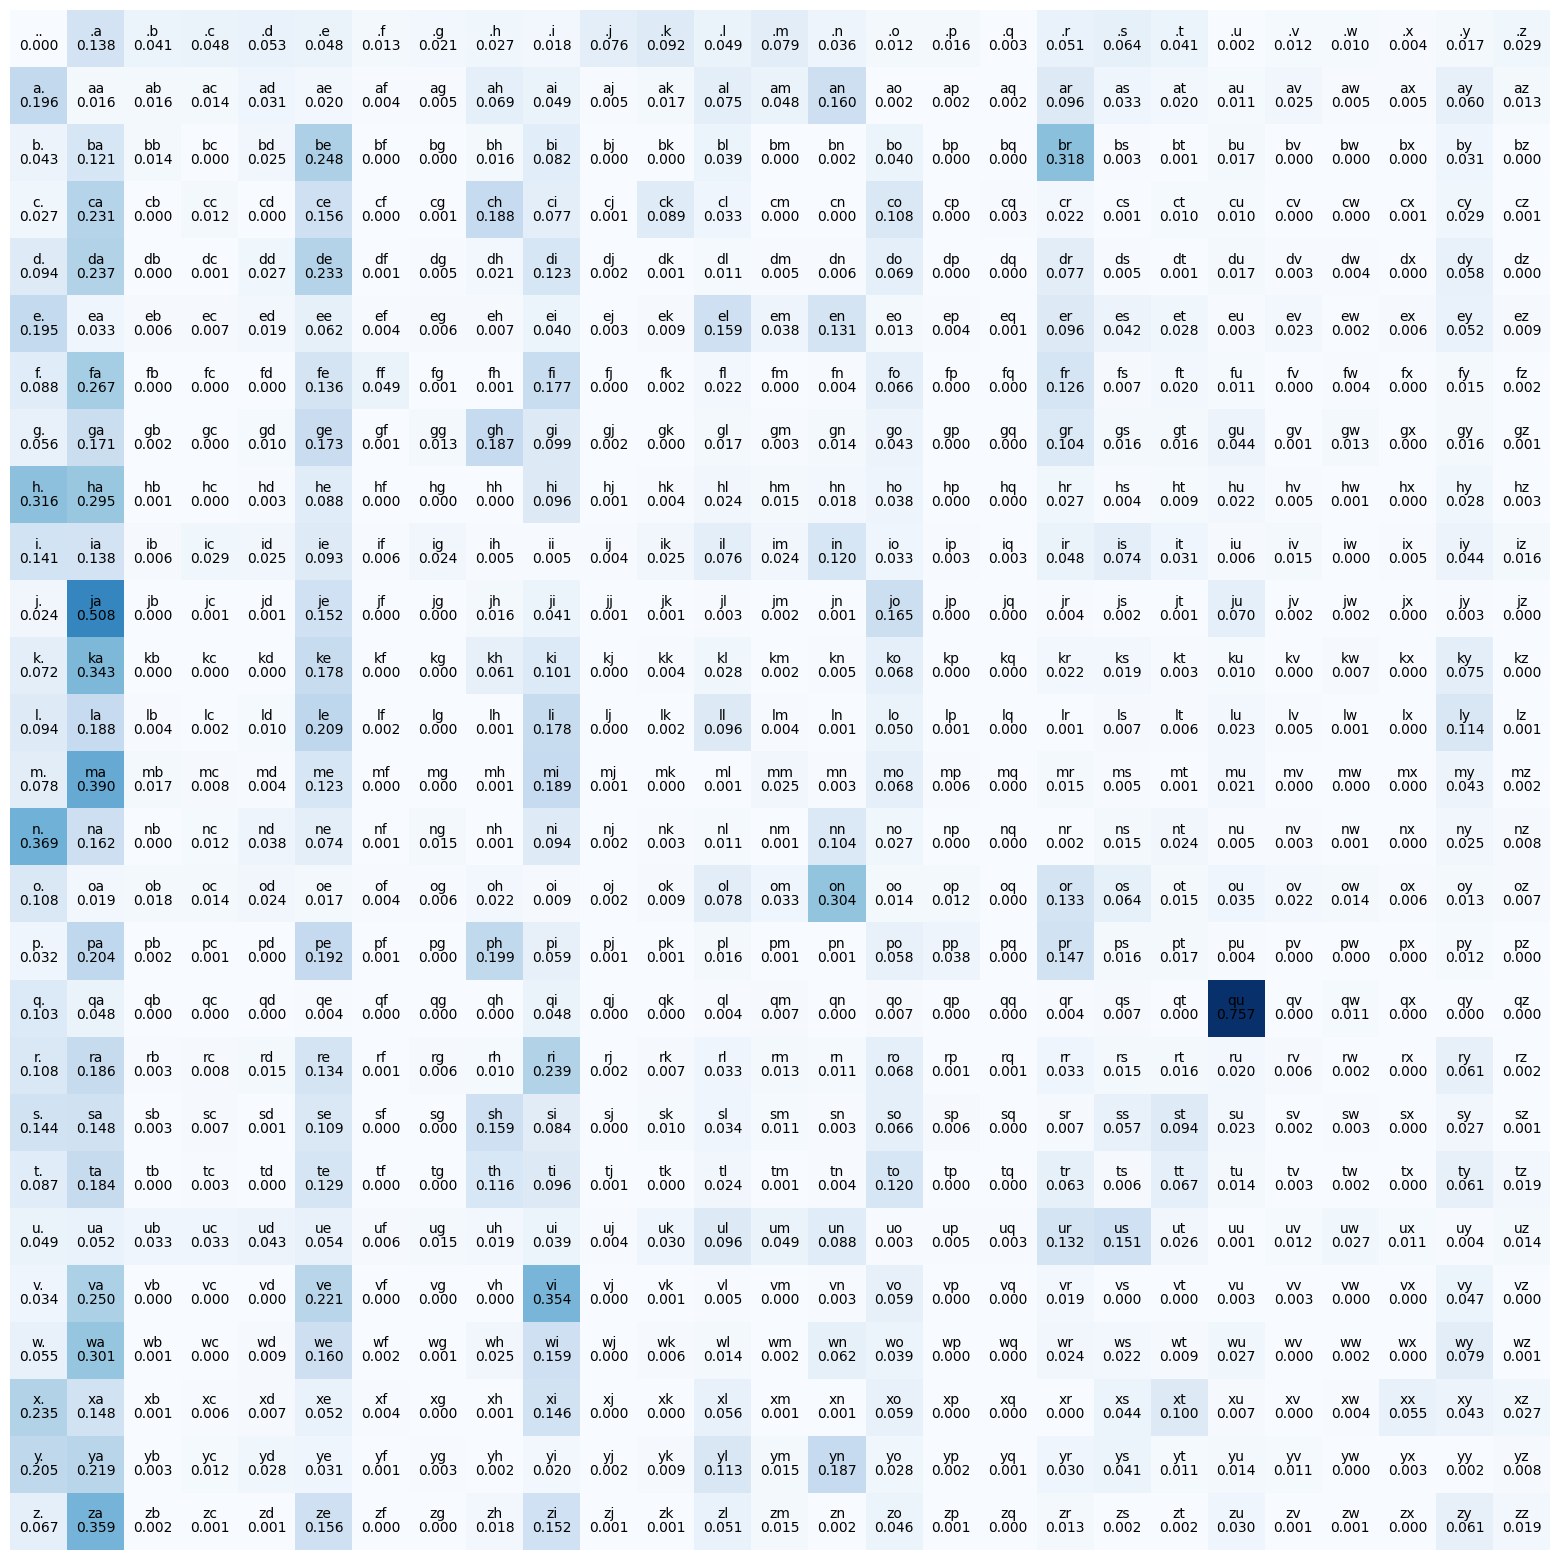

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(correct_res, cmap="Blues")

for i in range(27):
    for j in range(27):
        ch_str = i_to_s[i] + i_to_s[j]
        plt.text(j, i, ch_str, ha="center", va="bottom", color="k")
        plt.text(j, i, f"{correct_res[i, j].item():.3f}", ha="center", va="top", color="k")

plt.axis("off")
plt.show()


In [ ]:
p1 = correct_res[0]
p1

array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])

In [ ]:
idx1 = np.random.choice(list(range(len(p1))), p=p1)
i_to_s[idx1]

'n'

In [ ]:
idx1

14

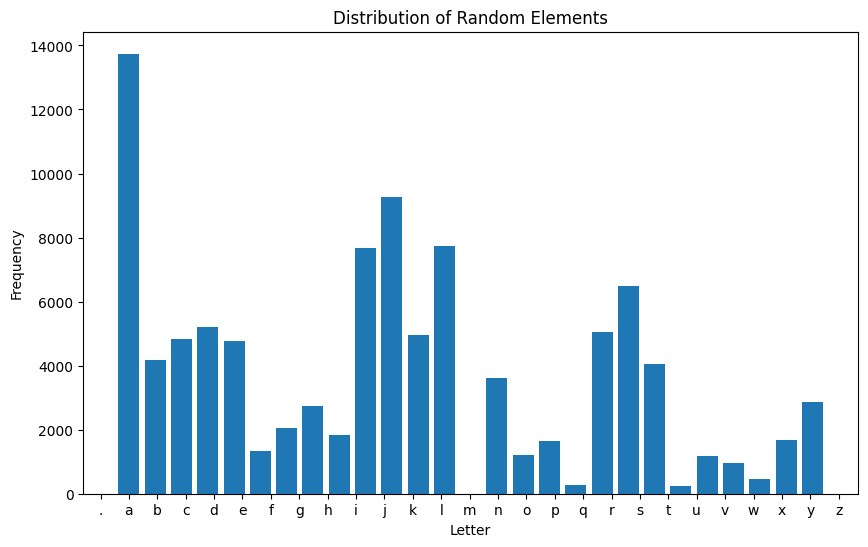

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list to store random values
random_values = []

# Number of iterations
num_iterations = 100000

# Generate random values and store them in the list
for _ in range(num_iterations):
    idx = np.random.choice(list(range(len(p1))), p=p1)
    random_values.append(idx)


# Convert numeric labels to words
x_labels = [i_to_s[idx] for idx in range(len(p1))]

# Plot a bar plot to visualize the distribution of random elements
plt.figure(figsize=(10, 6))
plt.hist(random_values, bins=len(p1), align='left', rwidth=0.8)
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.title('Distribution of Random Elements')
plt.xticks(np.arange(len(p1)), x_labels)
plt.show()


In [ ]:
m_count = random_values.count(s_to_i['n'])
print("Number of 'n's sampled:", m_count)

Number of 'n's sampled: 3505


In [ ]:
correct_res[0]

array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])

In [ ]:
def get_one_chr(array):
    chrs_idx = list(range(len(array)))
    chr_idx = np.random.choice(chrs_idx, p=array)
    return i_to_s[chr_idx]

In [ ]:
get_one_chr(correct_res[0])

'c'

In [ ]:
def get_name():
    name_list = []

    # Harfe avval
    ch = get_one_chr(correct_res[0])
    name_list.append(ch)

    # Halghe baraye baghie huruf
    while True:
        last_idx = s_to_i[name_list[-1]]
        ch = get_one_chr(correct_res[last_idx])
        name_list.append(ch)
        if ch == '.':
            break

    return "".join(ch for ch in name_list)

In [ ]:
get_name()

'san.'

In [ ]:
for i in range(10):
    print(get_name())

iviliyahna.
ki.
tizan.
d.
k.
yzelehl.
viabl.
rstelimise.
ja.
annedr.
